<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#part 1

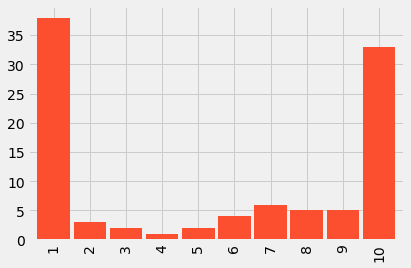

In [230]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

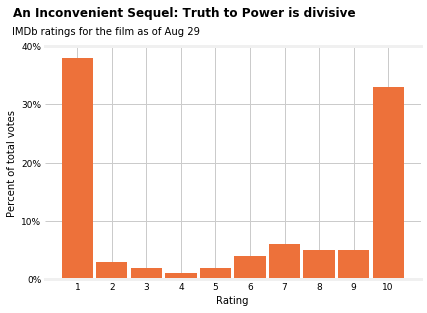

In [231]:
# set the style
plt.style.use('fivethirtyeight')

# figure and axes
fig, ax = plt.subplots()

# Plot, color and shape the bars
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=0.9)

# Figures background color
fig.set_facecolor(color='None')

# Axes background color
ax.set_facecolor(color='None')


# fix grid with tick markts
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])

ax.set_yticks([0,10,20,30,40])

# set ticklabels
ax.set_xticklabels(range(1,11,1), fontsize=9)

ax.set_yticklabels(['0%', '10%', '20%','30%' ,'40%'], fontsize=9)

# set spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# set x label
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight=500)
ax.set_xlabel('Rating', fontsize=10, fontweight=500)


# title
ax.set_title('An Inconvenient Sequel: Truth to Power is divisive',fontsize=12, fontweight='bold', x=.37, y=1.1)

#set subtitle (using text method and not subtitle method)
ax.text(s="IMDb ratings for the film as of Aug 29", x=-.9, y=42, fontsize=10)

# show the graph, squeltch the return output 
plt.show()

#Part 2
https://fivethirtyeight.com/features/the-rise-of-religiously-inspired-terrorism-in-france/

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/terrorism/eu_terrorism_fatalities_by_year.csv'
EUdata = pd.read_csv(url)

france_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/terrorism/france_terrorism_fatalities_by_year.csv'
Frandata = pd.read_csv(france_url)

In [22]:
print(EUdata.shape)
EUdata.head()

(29, 2)


,iyear,fatalities
0,2014,5
1,2013,6
2,2012,10
3,2011,4
4,2010,4


In [27]:
EUdata['EU_fatalities'] = EUdata['fatalities']

,iyear,fatalities,EU_fatalities
0,2014,5,5
1,2013,6,6
2,2012,10,10
3,2011,4,4
4,2010,4,4


In [0]:
EUdata = EUdata.drop(['fatalities'], axis=1)

In [90]:
print(EUdata.shape)
EUdata.head()

(29, 2)


,iyear,EU_fatalities
0,2014,5
1,2013,6
2,2012,10
3,2011,4
4,2010,4


In [92]:
EUdata['iyear']

0     2014
1     2013
2     2012
3     2011
4     2010
5     2009
6     2008
7     2007
8     2006
9     2005
10    2004
11    2003
12    2002
13    2001
14    2000
15    1999
16    1998
17    1997
18    1996
19    1995
20    1994
21    1993
22    1992
23    1991
24    1990
25    1989
26    1988
27    1987
28    1986
Name: iyear, dtype: int64

In [89]:
print(Frandata.shape)
Frandata.head()

(43, 2)


,iyear,fatalities
0,2014,1
1,2013,0
2,2012,8
3,2011,0
4,2010,0


In [0]:
# merge data sets to get same amount of years 
merged = pd.merge(EUdata, Frandata, on='iyear', how='left')

In [169]:
print(merged.shape)
merged.head(30)

(29, 3)


,iyear,EU_fatalities,fatalities
0,2014,5,1
1,2013,6,0
2,2012,10,8
3,2011,4,0
4,2010,4,0
5,2009,14,0
6,2008,3,0
7,2007,8,3
8,2006,6,1
9,2005,60,0


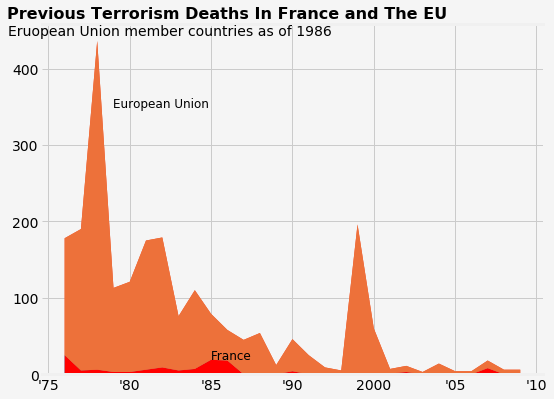

In [270]:
# set the style
plt.style.use('fivethirtyeight')

# figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(x,y)
# plot, color and shape of bars

ax.stackplot(merged['iyear'], merged['fatalities'], merged['EU_fatalities'], 
             labels=['France', "European Union"], 
             colors=('red','ED713A'), 
             baseline='zero')


#Figures background color 
fig.set_facecolor(color='whitesmoke')
ax.set_facecolor(color='whitesmoke')


# set spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


# set tickmarks
ax.set_yticks([0,100,200,300,400])

# fix xticklabels 
ax.set_xticklabels(['1970',"'75","'80","'85","'90","2000","'05","'10"])

# no x or y axis labels needed


# set title
ax.set_title("Previous Terrorism Deaths In France and The EU", fontsize=16, fontweight='bold', x=.37, y=1)

#problem code below
ax.text(s="Eruopean Union member countries as of 1986", x=1982.5, y=444, fontsize=14)

ax.text(s='European Union', x=1989, y=350, fontsize=12)
ax.text(s='France', x=1995, y=20, fontsize=12)


#plot it
plt.stackplot(x,y, alpha=0.2 )

plt.show()


# second attempt but a different way

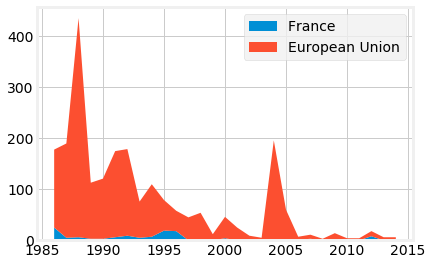

In [274]:
# set the style
plt.style.use('fivethirtyeight')

# figure and axes 
fig, ax = plt.subplots()



# variables from merged data
x = merged['iyear']
y1 = merged['fatalities']
y2 = merged['EU_fatalities']

y = np.vstack([y1, y2])

labels = ["France ", "European Union"]

ax.stackplot(x, y1, y2, labels=labels)
ax.legend(loc='upper right')


#Figures background color 
fig.set_facecolor(color='None')
ax.set_facecolor(color='None')

# plot it
plt.show()


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [275]:
# exploring Altair
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [334]:
bob = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

bob.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


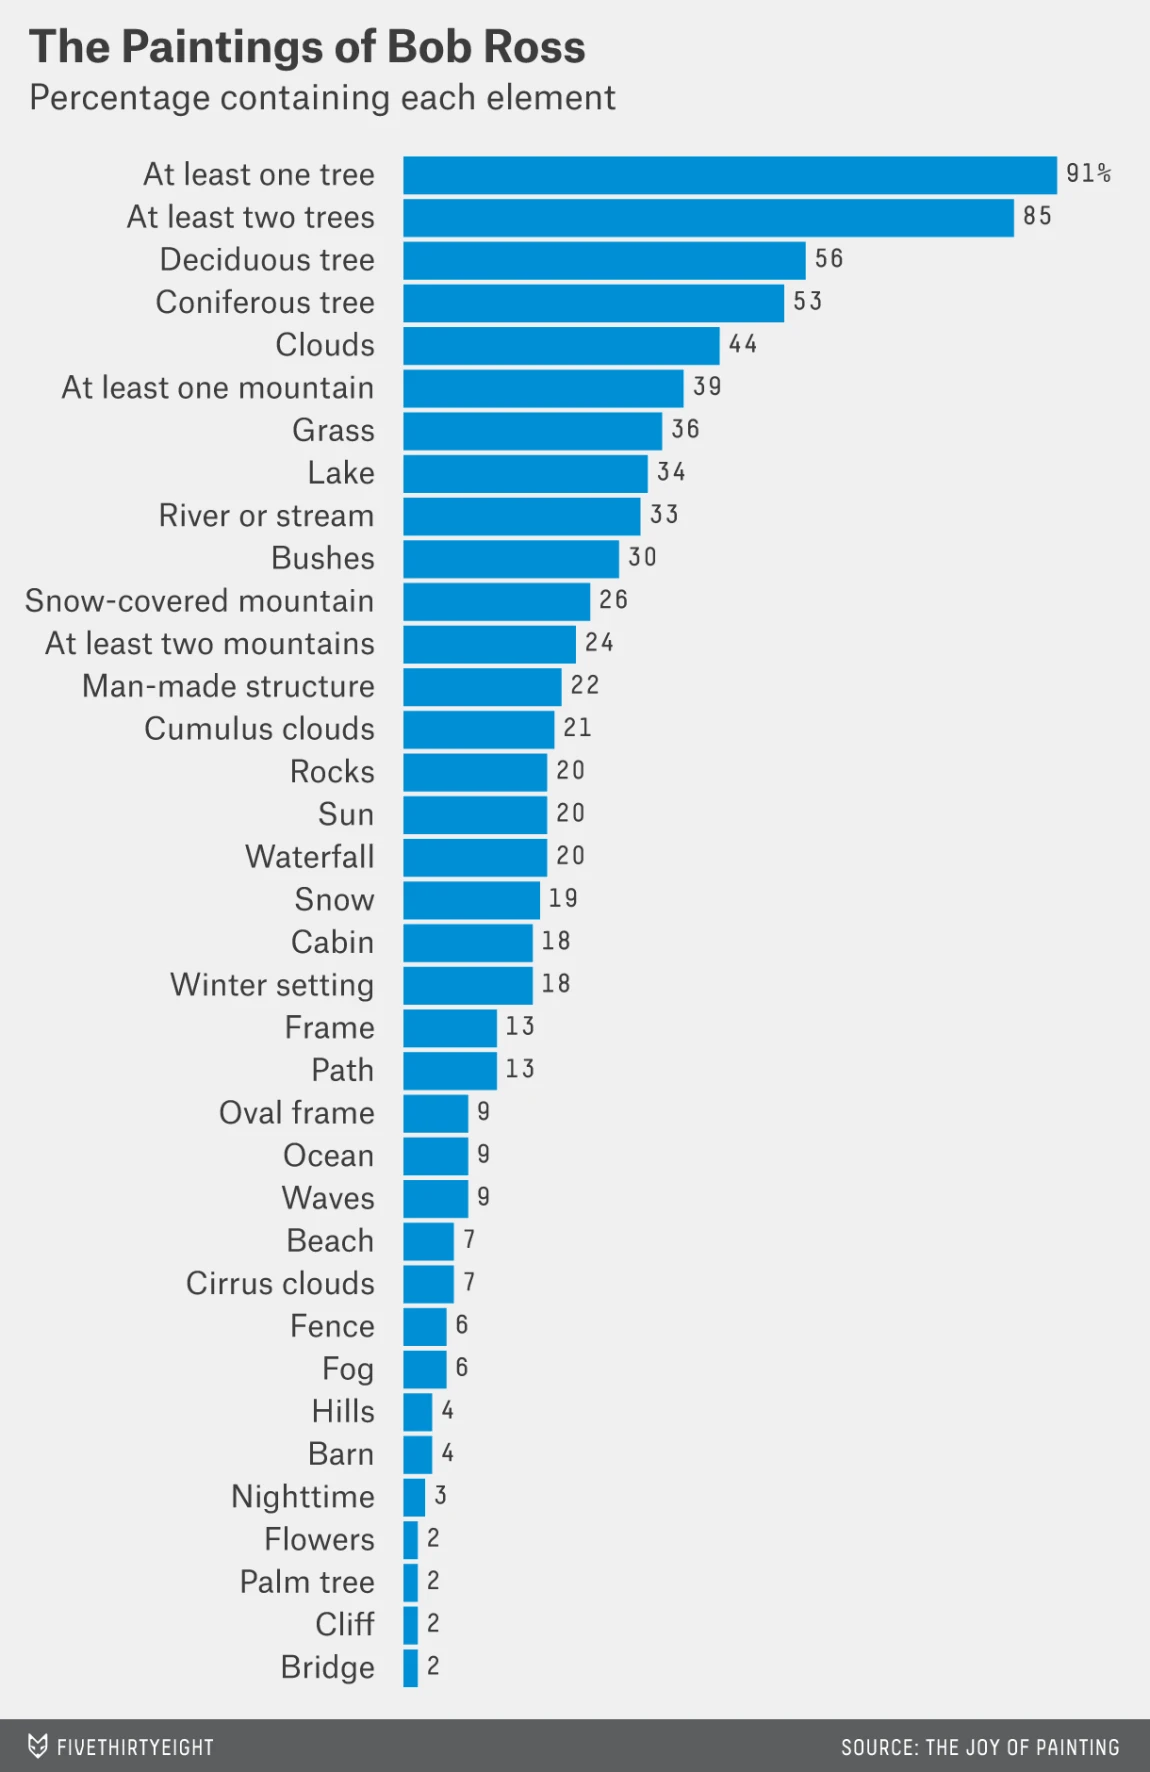

In [335]:
bob.sum(axis=0)

EPISODE            S01E01S01E02S01E03S01E04S01E05S01E06S01E07S01E...
TITLE              "A WALK IN THE WOODS""MT. MCKINLEY""EBONY SUNS...
APPLE_FRAME                                                        1
AURORA_BOREALIS                                                    2
BARN                                                              17
                                         ...                        
WAVES                                                             34
WINDMILL                                                           1
WINDOW_FRAME                                                       1
WINTER                                                            69
WOOD_FRAMED                                                        1
Length: 69, dtype: object

In [336]:
bob = bob.drop(['EPISODE', 'TITLE'],axis=1)
bob.head()

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [337]:
bob.append(bob.sum().rename('Total'))


,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
400,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
401,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


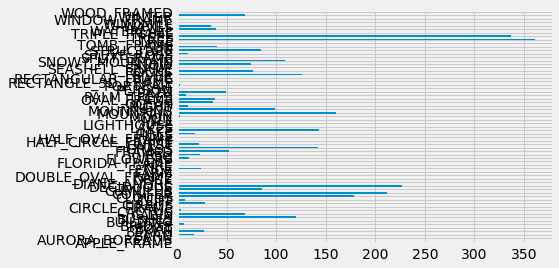

In [340]:
bob.sum().plot(kind='barh');

In [0]:
# have not finished

plt.style.use('fivethirtyeight')

# figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# plot, color and shape of bars

ax.bar(bob, width=.9, height=[0,50,100,150,200,250,300,400], color='blue', )



#Figures background color 
fig.set_facecolor(color='whitesmoke')
ax.set_facecolor(color='whitesmoke')